In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [2]:
#version 3
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

Reading CSV files

In [3]:
cts = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\clicks_train_sample.csv')
dc = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\documents_categories.csv')
de = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\documents_entities.csv')
dm = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\documents_meta.csv')
dt = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\documents_topics.csv')
ev = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\events.csv')
pgv = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\page_views_newsample.csv')
pc = pd.read_csv('C:\\Users\\Rose\\Desktop\\Capstone4\\promoted_content.csv')

E:\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Merge events with documents_meta using document_id
evdm = pd.merge(ev, dm, on='document_id')
evdm

,display_id,uuid,document_id,timestamp,platform,geo_location,source_id,publisher_id,publish_time
0,1,cb8c55702adb93,379743,61,3,US>SC>519,6482.0,24.0,NaN
1,1239772,a2eb3a4e0a4c08,379743,74476960,1,CA>BC,6482.0,24.0,NaN
2,1306670,c9d0cf076200f3,379743,78297892,2,US,6482.0,24.0,NaN
3,2357895,6e0aabe592ba61,379743,148985378,2,US,6482.0,24.0,NaN
4,2785946,1eb4bef36f8623,379743,177159039,1,US>RI>521,6482.0,24.0,NaN
...,...,...,...,...,...,...,...,...,...
23120121,23119969,15a573f86dfeb6,2994282,1295990472,2,US>CA>862,2578.0,218.0,2016-06-28 22:00:00
23120122,23120028,f3eae20e5f3320,897027,1295994117,1,US>IN>602,10202.0,9.0,2014-09-29 00:00:00
23120123,23120059,bffdaa000741da,2997881,1295995517,2,US,798.0,435.0,2016-06-28 23:00:00
23120124,23120067,f71c55144e077d,849598,1295996093,2,US>WV>559,2441.0,289.0,2015-09-08 18:00:00


In [5]:
# Merge events & documents_meta dataframe with click_trains_sample
evdmcts = pd.merge(evdm, cts, on='display_id')
evdmcts

,display_id,uuid,document_id,timestamp,platform,geo_location,source_id,publisher_id,publish_time,ad_id,clicked
0,34922,6288e67b1d54c6,1794259,2600122,2,US>TX>623,93.0,407.0,2016-06-14 00:00:00,37851,0
1,36471,54d8dfb74dcef5,1794259,2729315,2,US>FL>548,93.0,407.0,2016-06-14 00:00:00,12650,0
2,69037,eb345ac48eaa11,1794259,5686447,2,US>IL>602,93.0,407.0,2016-06-14 00:00:00,92369,0
3,78208,d53551d0b23d67,1794259,6606779,2,US>CA>803,93.0,407.0,2016-06-14 00:00:00,37156,0
4,94115,cfd33e4e9e05b5,1794259,8259821,1,US>WA>819,93.0,407.0,2016-06-14 00:00:00,275295,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,16873858,241b25e794bb96,1318775,1123148136,3,CA>ON,366.0,781.0,2016-04-19 14:00:00,305682,0
999996,16873865,82cb25078d7865,1653851,1123148476,2,US>MN>613,982.0,33.0,2016-06-07 19:00:00,277464,0
999997,16874363,1a9b29a1803752,160751,1123183893,3,US>FL>539,8894.0,469.0,NaN,155508,0
999998,16874364,b983ed36310309,2825696,1123183926,2,US>TX>618,247.0,236.0,2016-06-27 00:00:00,250319,1


In [6]:
# Merge events & documents_meta & click_trains_sample
evdmctspc = pd.merge(evdmcts, pc, on='ad_id')
evdmctspc

,display_id,uuid,document_id_x,timestamp,platform,geo_location,source_id,publisher_id,publish_time,ad_id,clicked,document_id_y,campaign_id,advertiser_id
0,34922,6288e67b1d54c6,1794259,2600122,2,US>TX>623,93.0,407.0,2016-06-14 00:00:00,37851,0,298547,5342,580
1,3982567,f90db73a75332d,1060089,253476258,1,US>VA>544,7744.0,1204.0,2016-01-23 01:00:00,37851,0,298547,5342,580
2,7604922,9853a49f80e2f8,1303771,520980585,2,US>MO>616,12705.0,1044.0,2016-04-14 20:00:00,37851,0,298547,5342,580
3,1439583,e4d4a17cf8c7e6,1667632,86010864,2,US>WA>819,7267.0,58.0,2016-06-08 00:00:00,37851,0,298547,5342,580
4,3522033,4789ccff327551,1601704,228163963,2,US,12705.0,1044.0,2016-06-03 17:00:00,37851,0,298547,5342,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,16841692,d2e3542e47da0e,624053,1121126231,1,CA>AB,8179.0,142.0,NaN,546594,0,1125673,11340,1882
999996,16866762,68ec61d8fa368f,2824990,1122675040,3,US>WY>759,7270.0,58.0,2016-06-26 23:00:00,498206,0,2440858,32867,210
999997,16859782,cf08c047cfc412,1073469,1122222637,2,CA>ON,105.0,206.0,2016-02-01 12:00:00,32520,0,860793,4789,580
999998,16870073,a06a4e9ca33248,385256,1122891563,1,US>VA>511,1032.0,1025.0,2014-09-21 00:00:00,546961,0,2811782,34380,2884


In [39]:
# Saving to copy for safety
thedf = evdmctspc.copy()
thedf

,display_id,uuid,document_id_x,timestamp,platform,geo_location,source_id,publisher_id,publish_time,ad_id,clicked,document_id_y,campaign_id,advertiser_id
0,34922,6288e67b1d54c6,1794259,2600122,2,US>TX>623,93.0,407.0,2016-06-14 00:00:00,37851,0,298547,5342,580
1,3982567,f90db73a75332d,1060089,253476258,1,US>VA>544,7744.0,1204.0,2016-01-23 01:00:00,37851,0,298547,5342,580
2,7604922,9853a49f80e2f8,1303771,520980585,2,US>MO>616,12705.0,1044.0,2016-04-14 20:00:00,37851,0,298547,5342,580
3,1439583,e4d4a17cf8c7e6,1667632,86010864,2,US>WA>819,7267.0,58.0,2016-06-08 00:00:00,37851,0,298547,5342,580
4,3522033,4789ccff327551,1601704,228163963,2,US,12705.0,1044.0,2016-06-03 17:00:00,37851,0,298547,5342,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,16841692,d2e3542e47da0e,624053,1121126231,1,CA>AB,8179.0,142.0,NaN,546594,0,1125673,11340,1882
999996,16866762,68ec61d8fa368f,2824990,1122675040,3,US>WY>759,7270.0,58.0,2016-06-26 23:00:00,498206,0,2440858,32867,210
999997,16859782,cf08c047cfc412,1073469,1122222637,2,CA>ON,105.0,206.0,2016-02-01 12:00:00,32520,0,860793,4789,580
999998,16870073,a06a4e9ca33248,385256,1122891563,1,US>VA>511,1032.0,1025.0,2014-09-21 00:00:00,546961,0,2811782,34380,2884


In [44]:
thedf.clicked.value_counts()

0    806163
1    193837
Name: clicked, dtype: int64

In [45]:
thedf.platform.value_counts()

1    412028
2    407634
3    141499
1     18299
2     15258
3      5282
Name: platform, dtype: int64

In [46]:
thedf.groupby('clicked').sum()

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001718302C408>>

In [21]:
# Saving to copy for safety
df = evdmctspc.copy()
df

,display_id,uuid,document_id_x,timestamp,platform,geo_location,source_id,publisher_id,publish_time,ad_id,clicked,document_id_y,campaign_id,advertiser_id
0,34922,6288e67b1d54c6,1794259,2600122,2,US>TX>623,93.0,407.0,2016-06-14 00:00:00,37851,0,298547,5342,580
1,3982567,f90db73a75332d,1060089,253476258,1,US>VA>544,7744.0,1204.0,2016-01-23 01:00:00,37851,0,298547,5342,580
2,7604922,9853a49f80e2f8,1303771,520980585,2,US>MO>616,12705.0,1044.0,2016-04-14 20:00:00,37851,0,298547,5342,580
3,1439583,e4d4a17cf8c7e6,1667632,86010864,2,US>WA>819,7267.0,58.0,2016-06-08 00:00:00,37851,0,298547,5342,580
4,3522033,4789ccff327551,1601704,228163963,2,US,12705.0,1044.0,2016-06-03 17:00:00,37851,0,298547,5342,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,16841692,d2e3542e47da0e,624053,1121126231,1,CA>AB,8179.0,142.0,NaN,546594,0,1125673,11340,1882
999996,16866762,68ec61d8fa368f,2824990,1122675040,3,US>WY>759,7270.0,58.0,2016-06-26 23:00:00,498206,0,2440858,32867,210
999997,16859782,cf08c047cfc412,1073469,1122222637,2,CA>ON,105.0,206.0,2016-02-01 12:00:00,32520,0,860793,4789,580
999998,16870073,a06a4e9ca33248,385256,1122891563,1,US>VA>511,1032.0,1025.0,2014-09-21 00:00:00,546961,0,2811782,34380,2884


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   display_id     1000000 non-null  int64  
 1   uuid           1000000 non-null  object 
 2   document_id_x  1000000 non-null  int64  
 3   timestamp      1000000 non-null  int64  
 4   platform       1000000 non-null  object 
 5   geo_location   999982 non-null   object 
 6   source_id      999982 non-null   float64
 7   publisher_id   999982 non-null   float64
 8   publish_time   860325 non-null   object 
 9   ad_id          1000000 non-null  int64  
 10  clicked        1000000 non-null  int64  
 11  document_id_y  1000000 non-null  int64  
 12  campaign_id    1000000 non-null  int64  
 13  advertiser_id  1000000 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 114.4+ MB


In [23]:
df.clicked.value_counts()

0    806163
1    193837
Name: clicked, dtype: int64

In [24]:
df.platform.value_counts()

1    412028
2    407634
3    141499
1     18299
2     15258
3      5282
Name: platform, dtype: int64

In [31]:
df.platform.value_counts().to_clipboard()

In [26]:
df.platform = df.platform.str.strip().astype(float)
df

,display_id,uuid,document_id_x,timestamp,platform,geo_location,source_id,publisher_id,publish_time,ad_id,clicked,document_id_y,campaign_id,advertiser_id
0,34922,6288e67b1d54c6,1794259,2600122,NaN,US>TX>623,93.0,407.0,2016-06-14 00:00:00,37851,0,298547,5342,580
1,3982567,f90db73a75332d,1060089,253476258,NaN,US>VA>544,7744.0,1204.0,2016-01-23 01:00:00,37851,0,298547,5342,580
2,7604922,9853a49f80e2f8,1303771,520980585,NaN,US>MO>616,12705.0,1044.0,2016-04-14 20:00:00,37851,0,298547,5342,580
3,1439583,e4d4a17cf8c7e6,1667632,86010864,NaN,US>WA>819,7267.0,58.0,2016-06-08 00:00:00,37851,0,298547,5342,580
4,3522033,4789ccff327551,1601704,228163963,NaN,US,12705.0,1044.0,2016-06-03 17:00:00,37851,0,298547,5342,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,16841692,d2e3542e47da0e,624053,1121126231,NaN,CA>AB,8179.0,142.0,NaN,546594,0,1125673,11340,1882
999996,16866762,68ec61d8fa368f,2824990,1122675040,NaN,US>WY>759,7270.0,58.0,2016-06-26 23:00:00,498206,0,2440858,32867,210
999997,16859782,cf08c047cfc412,1073469,1122222637,NaN,CA>ON,105.0,206.0,2016-02-01 12:00:00,32520,0,860793,4789,580
999998,16870073,a06a4e9ca33248,385256,1122891563,NaN,US>VA>511,1032.0,1025.0,2014-09-21 00:00:00,546961,0,2811782,34380,2884


In [29]:
# Saving to copy for safety
newdf = evdmctspc.copy()
newdf

,display_id,uuid,document_id_x,timestamp,platform,geo_location,source_id,publisher_id,publish_time,ad_id,clicked,document_id_y,campaign_id,advertiser_id
0,34922,6288e67b1d54c6,1794259,2600122,2,US>TX>623,93.0,407.0,2016-06-14 00:00:00,37851,0,298547,5342,580
1,3982567,f90db73a75332d,1060089,253476258,1,US>VA>544,7744.0,1204.0,2016-01-23 01:00:00,37851,0,298547,5342,580
2,7604922,9853a49f80e2f8,1303771,520980585,2,US>MO>616,12705.0,1044.0,2016-04-14 20:00:00,37851,0,298547,5342,580
3,1439583,e4d4a17cf8c7e6,1667632,86010864,2,US>WA>819,7267.0,58.0,2016-06-08 00:00:00,37851,0,298547,5342,580
4,3522033,4789ccff327551,1601704,228163963,2,US,12705.0,1044.0,2016-06-03 17:00:00,37851,0,298547,5342,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,16841692,d2e3542e47da0e,624053,1121126231,1,CA>AB,8179.0,142.0,NaN,546594,0,1125673,11340,1882
999996,16866762,68ec61d8fa368f,2824990,1122675040,3,US>WY>759,7270.0,58.0,2016-06-26 23:00:00,498206,0,2440858,32867,210
999997,16859782,cf08c047cfc412,1073469,1122222637,2,CA>ON,105.0,206.0,2016-02-01 12:00:00,32520,0,860793,4789,580
999998,16870073,a06a4e9ca33248,385256,1122891563,1,US>VA>511,1032.0,1025.0,2014-09-21 00:00:00,546961,0,2811782,34380,2884


In [53]:
newdf.clicked.value_counts()

0    806163
1    193837
Name: clicked, dtype: int64

In [33]:
newdf.platform.value_counts()

1    412028
2    407634
3    141499
1     18299
2     15258
3      5282
Name: platform, dtype: int64

In [34]:
newdf.platform.value_counts().to_clipboard()

In [52]:
newdf.groupby('platform')['clicked'].sum()

platform
1    3178
2    3462
3     957
Name: clicked, dtype: int64

In [51]:
newdf.platform = newdf.platform.str.strip()

In [ ]:
df[timecolumn] = pd.to_datetime(time value, unit=‘ms’
But first we have to add 1465876799998 to the timestamp


In [30]:
df.platform = newdf.platform.str.strip().astype(float)
df

,display_id,uuid,document_id_x,timestamp,platform,geo_location,source_id,publisher_id,publish_time,ad_id,clicked,document_id_y,campaign_id,advertiser_id
0,34922,6288e67b1d54c6,1794259,2600122,NaN,US>TX>623,93.0,407.0,2016-06-14 00:00:00,37851,0,298547,5342,580
1,3982567,f90db73a75332d,1060089,253476258,NaN,US>VA>544,7744.0,1204.0,2016-01-23 01:00:00,37851,0,298547,5342,580
2,7604922,9853a49f80e2f8,1303771,520980585,NaN,US>MO>616,12705.0,1044.0,2016-04-14 20:00:00,37851,0,298547,5342,580
3,1439583,e4d4a17cf8c7e6,1667632,86010864,NaN,US>WA>819,7267.0,58.0,2016-06-08 00:00:00,37851,0,298547,5342,580
4,3522033,4789ccff327551,1601704,228163963,NaN,US,12705.0,1044.0,2016-06-03 17:00:00,37851,0,298547,5342,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,16841692,d2e3542e47da0e,624053,1121126231,NaN,CA>AB,8179.0,142.0,NaN,546594,0,1125673,11340,1882
999996,16866762,68ec61d8fa368f,2824990,1122675040,NaN,US>WY>759,7270.0,58.0,2016-06-26 23:00:00,498206,0,2440858,32867,210
999997,16859782,cf08c047cfc412,1073469,1122222637,NaN,CA>ON,105.0,206.0,2016-02-01 12:00:00,32520,0,860793,4789,580
999998,16870073,a06a4e9ca33248,385256,1122891563,NaN,US>VA>511,1032.0,1025.0,2014-09-21 00:00:00,546961,0,2811782,34380,2884


In [19]:
df.clicked.value_counts()

0    806163
1    193837
Name: clicked, dtype: int64

In [35]:
df.platform.value_counts()

1.0    18299
2.0    15258
3.0     5282
Name: platform, dtype: int64

In [17]:
# exporting the new dataframe as a CSV file
df.to_csv("df.csv")

E:\miniconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


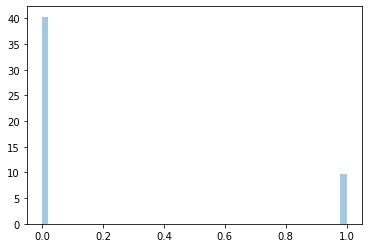

In [20]:
x = df['clicked'].values
sns.distplot(x)

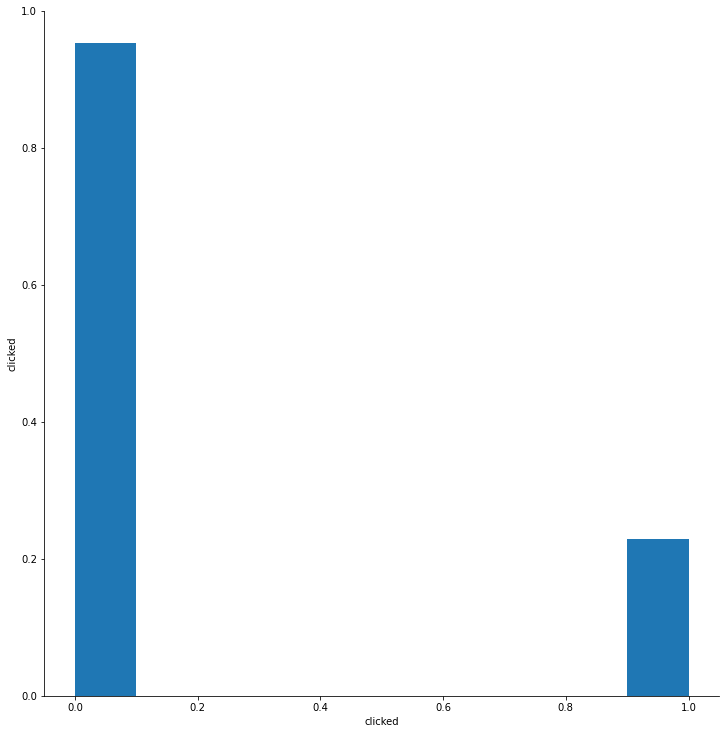

In [18]:
sns.pairplot(df[['clicked']], plot_kws = {"color": "green"}, height = 10)
